# [Bonus Tasks](svm_segm.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.ndimage as ndi
import skimage.morphology as morph
import skimage.util
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [9]:

def blend_result(img, seg, border_radius=1, interior_opacity=1, interior_opacity_decay=0.9, color=(0,1,0)): # Blendet ein Segmentierungsergebnis farbig in ein Bild ein
    img  = np.dstack([img] * 3).copy()                                                                      # Das Graustufenbild wird zu einem 3-kanaligen RGB-Bild gestapelt
    img -= img.min()                                                                                        # Normalisierung auf Werte von 0 bis 1
    img /= img.max()
    selem  = morph.disk(border_radius)                                                                      # Rand der Segmentmaske berechnen
    seg_bd = np.logical_xor(morph.binary_dilation(seg, selem), morph.binary_erosion(seg, selem))
    mask_decay = ndi.distance_transform_edt(seg)                                                            # Abstandstransformation der Maske
    for i in range(3):                                                                                      # Farbüberlagerung durchführen
        opacity = interior_opacity / pow(1 + mask_decay[seg], interior_opacity_decay)                       # Deckkraft abhängig vom Abstand modifizieren: Abstand vom Rand = hohe Deckkraft
        img[:,:,i][seg] = color[i] * opacity + (1 - opacity) * img[:,:,i][seg]                              # Farbüberlagerung im Inneren der Maske
        img[:,:,i][seg_bd] = color[i]                                                                       # Rand wird voll eingefärbt, ohne Transparenz
    return img

In [ ]:
patch_sizes = (32, 32)  # Größe des patches ist 32 * 32

---

**[Task 1.1.]()** Implement `create_data_matrix`:

In [ ]:
def create_data_matrix(img):                                            # Datenmatrix: jede Zeile ein Patch des Bildes, jede Spalte ein Pixelwert im Patch
    patches = skimage.util.view_as_blocks(img, block_shape=patch_sizes) # view_as_blocks teilt das Bild in gleich große Blöcke auf
    num_patches = patches.shape[0] * patches.shape[1]                   # Anzahl der Patches berechnen
    X = patches.reshape(num_patches, -1)                                # Umformung/Falltening: Patches zu Feature-Vektoren umformen

    return np.array(X)

**[Task 1.2.]()** Implement `create_gt_labels_vector`:

In [ ]:
def create_gt_labels_vector(img):
    patches = skimage.util.view_as_blocks(img, block_shape=patch_sizes) # view_as_blocks teilt das Bild in gleich große Blöcke auf
    num_patches = patches.shape[0] * patches.shape[1]                   # Anzahl der Patches berechnen

    y = []                                                              # leere Liste Y

    for i in range(patches.shape[0]):                                   # für jeden Pixel in patches wird die ground trueth festgelegt und der Liste Y hinzugefügt
        for j in range(patches.shape[1]):
            patch = patches[i,j]

            if np.mean(patch) > 0.5 :
                y.append(1)
                
            elif np.mean(patch) == 0:
                y.append(-1)

            else:
                y.append(0)
    
    return np.array(y)  

**[Task 1.3.]()** Create the SVM classifier:

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced', gamma=0.1)) # Code gegeben

**[Task 1.3 (a).]()** Create the data matrices for the images `dna-33` and `dna-44`:

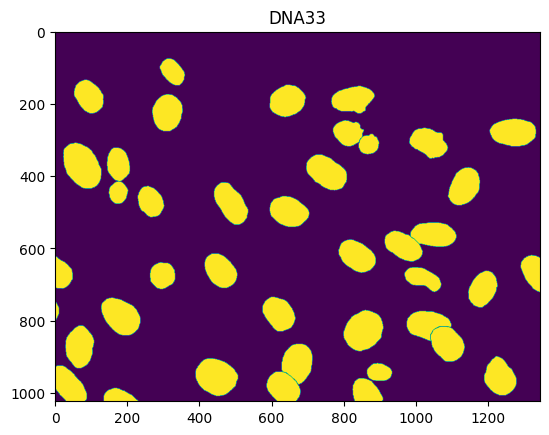

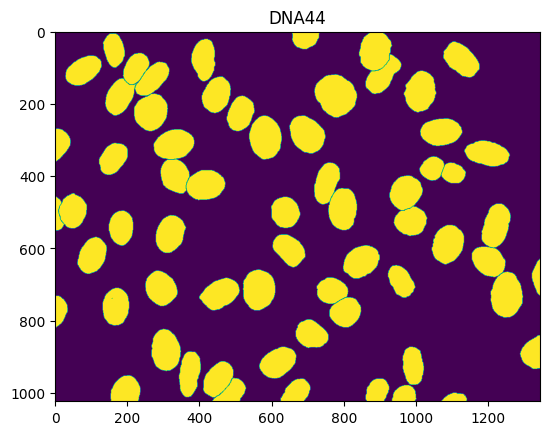

In [ ]:
DNA_33 = plt.imread('data/NIH3T3/gt/33.png')
DNA_44 = plt.imread('data/NIH3T3/gt/44.png')

plt.figure()
plt.imshow(DNA_33)
plt.title('DNA33')
plt.figure()
plt.imshow(DNA_44)
plt.title('DNA44')

X_33 = create_data_matrix(DNA_33) # Matrixen werden erstellt
X_44 = create_data_matrix(DNA_44)

**[Task 1.3 (b).]()** Create the corresponding ground truth label vectors:

In [ ]:
Y_33 = create_gt_labels_vector(DNA_33)  # Ground truth wird erstellt
Y_44 = create_gt_labels_vector(DNA_44)

**[Task 1.3 (c).]()** Create the *combined* data matrices and ground truth label vectors:

In [ ]:
X_valid = np.concatenate([X_33[Y_33 != 0], X_44[Y_44 != 0]]) # Stacking der Ground truth und der Matrix --> X_valid enthält alle Feature-Vektoren aus X_33 und X_44, bei denen das zugehörige Label Y ungleich 0 war.
Y_valid = np.concatenate([Y_33[Y_33 != 0], Y_44[Y_44 != 0]])

**[Task 1.3 (d).]()** Train the classifier using the data matrix and label vectors from above:

In [ ]:
clf.fit(X_valid, Y_valid) # Code war gegeben

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', gamma=0.1))])

**[Task 1.4.]()** Implement the function `predict_image`:

In [ ]:
# creates a binary image result, where patches corresponding to the predicted label +1 are set to True and to False otherwise, and returns it

create_data_matrix

clf.predict(X)

Test your implementation:

In [ ]:
img = plt.imread(f'data/NIH3T3/im/dna-0.png')
seg = predict_image(img)

plt.figure()
plt.imshow(blend_result(img, seg))

**[Task 1.5.]()** Perform batch processing: